In [2]:
from bs4 import BeautifulSoup
import requests
from splinter import Browser

In [3]:
url = 'http://quotes.toscrape.com/'

In [4]:
browser = Browser('chrome', headless = False)
browser.visit(url)

In [6]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [14]:
# Grab all quotes
soup.find_all('span', class_ = 'text')[0].text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [17]:
quotes = []
for x in soup.find_all('span', class_ = 'text'):
    quotes.append(x.text)

In [19]:
quotes

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

In [24]:
# grab author
authors = []
for x in soup.find_all('small', class_= 'author'):
    authors.append(x.text)

In [25]:
authors

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame({'Author': authors,
                  'Quotes': quotes})

In [28]:
df

,Author,Quotes
0,Albert Einstein,“The world as we have created it is a process ...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,“There are only two ways to live your life. On...
3,Jane Austen,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and..."
5,Albert Einstein,“Try not to become a man of success. Rather be...
6,André Gide,“It is better to be hated for what you are tha...
7,Thomas A. Edison,"“I have not failed. I've just found 10,000 way..."
8,Eleanor Roosevelt,“A woman is like a tea bag; you never know how...
9,Steve Martin,"“A day without sunshine is like, you know, nig..."


In [35]:
# grab the tags
soup.find_all('div', class_ = 'tags')[0].find_all('a')[0].text

'change'

In [49]:
tags = []
for x in soup.find_all('div', class_ = 'tags'):
    tag_element = []
    for tag in x.find_all('a'):
        tag_element.append(tag.text)
    tags.append(tag_element)

In [59]:
df['Tags'] = tags

In [60]:
df

,Author,Quotes,Tags
0,Albert Einstein,“The world as we have created it is a process ...,"[change, deep-thoughts, thinking, world]"
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...","[abilities, choices]"
2,Albert Einstein,“There are only two ways to live your life. On...,"[inspirational, life, live, miracle, miracles]"
3,Jane Austen,"“The person, be it gentleman or lady, who has ...","[aliteracy, books, classic, humor]"
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","[be-yourself, inspirational]"
5,Albert Einstein,“Try not to become a man of success. Rather be...,"[adulthood, success, value]"
6,André Gide,“It is better to be hated for what you are tha...,"[life, love]"
7,Thomas A. Edison,"“I have not failed. I've just found 10,000 way...","[edison, failure, inspirational, paraphrased]"
8,Eleanor Roosevelt,“A woman is like a tea bag; you never know how...,[misattributed-eleanor-roosevelt]
9,Steve Martin,"“A day without sunshine is like, you know, nig...","[humor, obvious, simile]"


In [63]:
browser.click_link_by_partial_text('Next')

In [64]:
import time

In [77]:
browser = Browser('chrome', headless = False)
browser.visit(url)

quotes = []
authors = []
tags = []
i = True
while i == True:
    for x in soup.find_all('span', class_ = 'text'):
        quotes.append(x.text)

    for x in soup.find_all('small', class_= 'author'):
        authors.append(x.text)
        

    for x in soup.find_all('div', class_ = 'tags'):
        tag_element = []
        for tag in x.find_all('a'):
            tag_element.append(tag.text)
        tags.append(tag_element)
    try:
        browser.click_link_by_partial_text('Next')
        time.sleep(1)
        html = browser.html
        soup = BeautifulSoup(html, 'html.parser')
    except:
        break

In [78]:
tags

[['truth'],
 ['death', 'life'],
 ['adventure', 'love'],
 ['courage'],
 ['life'],
 ['better-life-empathy'],
 ['books',
  'children',
  'difficult',
  'grown-ups',
  'write',
  'writers',
  'writing'],
 ['truth'],
 ['inspirational'],
 ['books', 'mind'],
 ['friends', 'heartbreak', 'inspirational', 'life', 'love', 'sisters'],
 ['courage', 'friends'],
 ['simplicity', 'understand'],
 ['love'],
 ['fantasy'],
 ['life', 'navigation'],
 ['activism',
  'apathy',
  'hate',
  'indifference',
  'inspirational',
  'love',
  'opposite',
  'philosophy'],
 ['friendship',
  'lack-of-friendship',
  'lack-of-love',
  'love',
  'marriage',
  'unhappy-marriage'],
 ['books', 'contentment', 'friends', 'friendship', 'life'],
 ['fate', 'life', 'misattributed-john-lennon', 'planning', 'plans'],
 ['love', 'poetry'],
 ['happiness'],
 ['attributed-no-source'],
 ['humor', 'religion'],
 ['humor'],
 ['comedy', 'life', 'yourself'],
 ['children', 'fairy-tales'],
 [],
 ['imagination'],
 ['music'],
 ['learning', 'reading',

In [79]:
df = pd.DataFrame({'Author': authors,
                  'Quote': quotes,
                  'Tags': tags})

In [82]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xkcd();

Text(0.5,1,'10 Most Common Quotes')

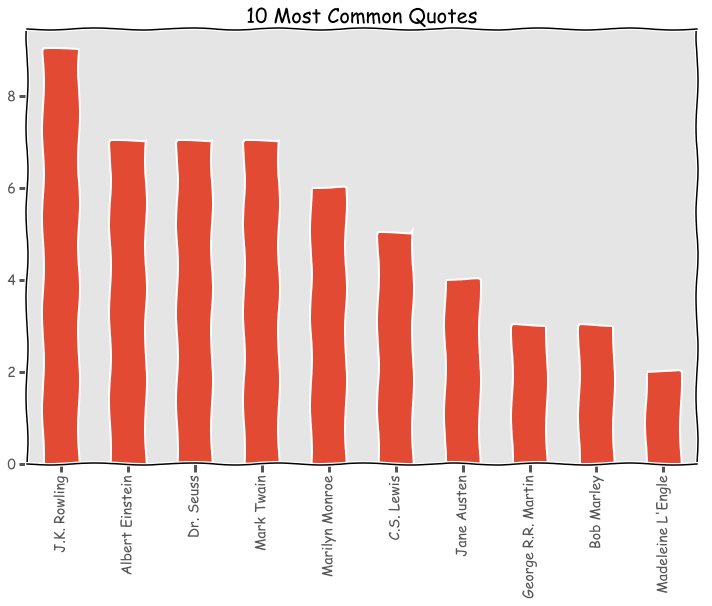

In [87]:
df['Author'].value_counts()[:10].plot(kind = 'bar', figsize = (12, 8))
plt.title('10 Most Common Quotes')

In [88]:
browser = Browser('chrome', headless = False)
browser.visit(url)

In [89]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [92]:
soup.find_all('a', text = '(about)')[0]['href']

'/author/Albert-Einstein'

In [95]:
einstein = url + soup.find_all('a', text = '(about)')[0]['href']

In [96]:
browser.visit(einstein)

In [97]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [99]:
soup.find('span', class_ = 'author-born-date').text

'March 14, 1879'

In [102]:
soup.find('span', class_ = 'author-born-location').text.replace('in', '').strip()

'Ulm, Germany'

In [103]:
browser.visit(url)
time.sleep(1)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

birth_date = []
birth_location = []
for x in soup.find_all('a', text = '(about)'):
    new_url = url + x['href']
    browser.visit(new_url)
    time.sleep(1)
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    birth_date.append(soup.find('span', class_ = 'author-born-date').text)
    
    birth_location.append(soup.find('span', class_ = 'author-born-location').text.replace('in', '').strip())

In [104]:
birth_date

['March 14, 1879',
 'July 31, 1965',
 'March 14, 1879',
 'December 16, 1775',
 'June 01, 1926',
 'March 14, 1879',
 'November 22, 1869',
 'February 11, 1847',
 'October 11, 1884',
 'August 14, 1945']

In [105]:
birth_location

['Ulm, Germany',
 'Yate, South Gloucestershire, England, The United Kgdom',
 'Ulm, Germany',
 'Steventon Rectory, Hampshire, The United Kgdom',
 'The United States',
 'Ulm, Germany',
 'Paris, France',
 'Milan, Ohio, The United States',
 'The United States',
 'Waco, Texas, The United States']

In [113]:
browser = Browser('chrome', headless = False)
browser.visit(url)
time.sleep(1)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
browser1 = Browser('chrome', headless = False)

quotes = []
authors = []
tags = []
birth_date = []
birth_location = []
i = True
while i == True:
    for x in soup.find_all('span', class_ = 'text'):
        quotes.append(x.text)

    for x in soup.find_all('small', class_= 'author'):
        authors.append(x.text)
        

    for x in soup.find_all('div', class_ = 'tags'):
        tag_element = []
        for tag in x.find_all('a'):
            tag_element.append(tag.text)
        tags.append(tag_element)
        
    for x in soup.find_all('a', text = '(about)'):
        new_url = url + x['href']
        browser1.visit(new_url)
        time.sleep(1)
        html = browser1.html
        soup1 = BeautifulSoup(html, 'html.parser')

        birth_date.append(soup1.find('span', class_ = 'author-born-date').text)

        birth_location.append(soup1.find('span', class_ = 'author-born-location').text.replace('in', '').strip())
    
    try:
        browser.click_link_by_partial_text('Next')
        time.sleep(1)
        html = browser.html
        soup = BeautifulSoup(html, 'html.parser')
    except:
        break

In [114]:
len(authors)

100

In [115]:
df = pd.DataFrame({'Author': authors,
                  'Quote': quotes,
                  'Tags': tags,
                  'Birth_Date': birth_date,
                  'Birth_Location': birth_location})

In [116]:
df

,Author,Quote,Tags,Birth_Date,Birth_Location
0,Albert Einstein,“The world as we have created it is a process ...,"[change, deep-thoughts, thinking, world]","March 14, 1879","Ulm, Germany"
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...","[abilities, choices]","July 31, 1965","Yate, South Gloucestershire, England, The Unit..."
2,Albert Einstein,“There are only two ways to live your life. On...,"[inspirational, life, live, miracle, miracles]","March 14, 1879","Ulm, Germany"
3,Jane Austen,"“The person, be it gentleman or lady, who has ...","[aliteracy, books, classic, humor]","December 16, 1775","Steventon Rectory, Hampshire, The United Kgdom"
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","[be-yourself, inspirational]","June 01, 1926",The United States
5,Albert Einstein,“Try not to become a man of success. Rather be...,"[adulthood, success, value]","March 14, 1879","Ulm, Germany"
6,André Gide,“It is better to be hated for what you are tha...,"[life, love]","November 22, 1869","Paris, France"
7,Thomas A. Edison,"“I have not failed. I've just found 10,000 way...","[edison, failure, inspirational, paraphrased]","February 11, 1847","Milan, Ohio, The United States"
8,Eleanor Roosevelt,“A woman is like a tea bag; you never know how...,[misattributed-eleanor-roosevelt],"October 11, 1884",The United States
9,Steve Martin,"“A day without sunshine is like, you know, nig...","[humor, obvious, simile]","August 14, 1945","Waco, Texas, The United States"
